In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
class Card:
    def __init__(self, number, symbol):
        self.number = number
        self.symbol = symbol

def shuffle(deck, seed=None):
    if seed is not None:
        random.seed(seed)
    random.shuffle(deck)

def find_hand_value(hand):
    value = 0
    aces_count = 0

    for card in hand:
        if card.number == "A":
            aces_count += 1
            value += 11  
        elif card.number in ["J", "Q", "K"]:
            value += 10
        else:
            value += int(card.number)

    while value > 21 and aces_count > 0:
        value -= 10  
        aces_count -= 1

    return value

In [3]:
def simulation(times):
    cash = 1000000000000
    start_amount = cash
    betting_unit = 1000
    number_of_decks = 6
    refresh_threshold = 70
    
    win_count = 0
    lose_count = 0
    tie_count = 0
    player_busted_count = 0
    dealer_busted_count = 0
    cash_history = []  
    num_busted = {}

    symbols = ["spade", "heart", "diamond", "club"]
    values = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]

    round = 1
    while True:
        if round > times:
            break

        deck = []

        for _ in range(number_of_decks):
            for symbol in symbols:
                for value in values:
                    card = Card(value, symbol)
                    deck.append(card)

        shuffle(deck)

        while len(deck) > 52 * number_of_decks * refresh_threshold / 100:
            if round > times:
                break

            cash_history.append(cash)
            
            player_hand = []
            dealer_hand = []

            bet = betting_unit
            cash -= bet  

            if len(deck) < 4:
                break

            player_hand.append(deck.pop())
            player_hand.append(deck.pop())
            dealer_hand.append(deck.pop())
            dealer_hand.append(deck.pop())

            player_hand_value = find_hand_value(player_hand)
            dealer_hand_value = find_hand_value(dealer_hand)
            if player_hand_value == 21 and dealer_hand_value != 21:
                cash += bet * 2.5
                win_count += 1 
                round += 1
                continue

            player_hand_value = find_hand_value(player_hand)
            while player_hand_value < 17:
                if len(deck) == 0:
                    break
                card = deck.pop()
                player_hand.append(card)
                player_hand_value = find_hand_value(player_hand)

            if player_hand_value > 21:
                busted_value = find_hand_value(player_hand[:len(player_hand)-1])
                num_busted[busted_value] = num_busted.get(busted_value, 0) + 1
                player_busted_count += 1  
                lose_count += 1  
                round += 1
                continue

            dealer_hand_value = find_hand_value(dealer_hand)
            while dealer_hand_value < 17:
                if len(deck) == 0: 
                    break
                card = deck.pop()
                dealer_hand.append(card)
                dealer_hand_value = find_hand_value(dealer_hand)

            if dealer_hand_value > 21:
                cash += bet * 2
                dealer_busted_count += 1 
                win_count += 1  
            elif player_hand_value > dealer_hand_value:
                cash += bet * 2
                win_count += 1  
            elif player_hand_value < dealer_hand_value:
                lose_count += 1  
            else:
                cash += bet  
                tie_count += 1 

            round += 1

    print(f"Total round: {round-1}")
    print(f"Total cash: {cash}")
    print(f"Start Amount: {start_amount}")
    print(f"Profit: {cash - start_amount}")
    print(f"Win: {win_count}")
    print(f"Lose: {lose_count}")
    print(f"Tie: {tie_count}")
    print(f"Player busted: {player_busted_count}")
    print(f"Dealer busted: {dealer_busted_count}")
    print(f"Win Rate: {win_count/times}")
    print(f"Lose Rate: {lose_count/times}")
    print(f"Tie Rate: {tie_count/times}")
    print(f"Dealer Busted : Player Busted  =  1 : {player_busted_count/dealer_busted_count}")

    plt.figure(figsize=(10, 6))
    sorted_busted_values = sorted(num_busted.keys())
    sorted_busted_counts = [num_busted[value] for value in sorted_busted_values]
    plt.bar(sorted_busted_values, sorted_busted_counts, color='skyblue', edgecolor='black')
    plt.xlabel('Player Hand Value Before Bust')
    plt.ylabel('Number of Times Busted')
    plt.title('Player Busted Frequency by Hand Value')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(cash_history)
    plt.xlabel('Round')
    plt.ylabel('Cash')
    plt.title('Cash History')
    plt.show()

Total round: 10
Total cash: 1000000005000
Start Amount: 1000000000000
Profit: 5000
Win: 7
Lose: 2
Tie: 1
Player busted: 2
Dealer busted: 4
Win Rate: 0.7
Lose Rate: 0.2
Tie Rate: 0.1
Dealer Busted : Player Busted  =  1 : 0.5


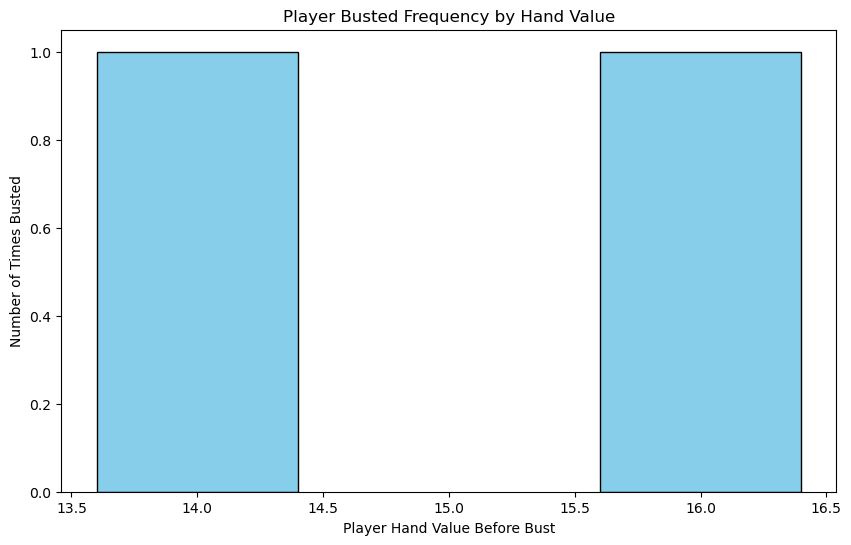

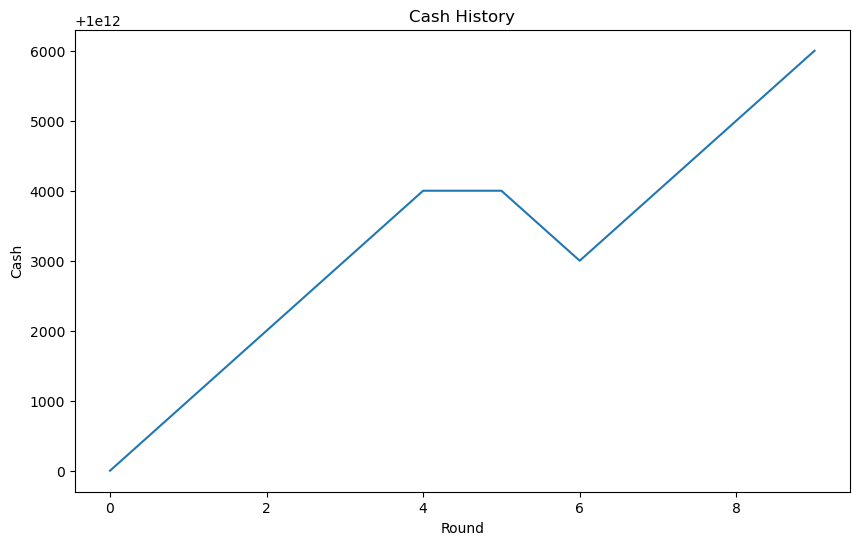

In [4]:
simulation(10)

Total round: 100
Total cash: 999999980500.0
Start Amount: 1000000000000
Profit: -19500.0
Win: 35
Lose: 56
Tie: 9
Player busted: 35
Dealer busted: 14
Win Rate: 0.35
Lose Rate: 0.56
Tie Rate: 0.09
Dealer Busted : Player Busted  =  1 : 2.5


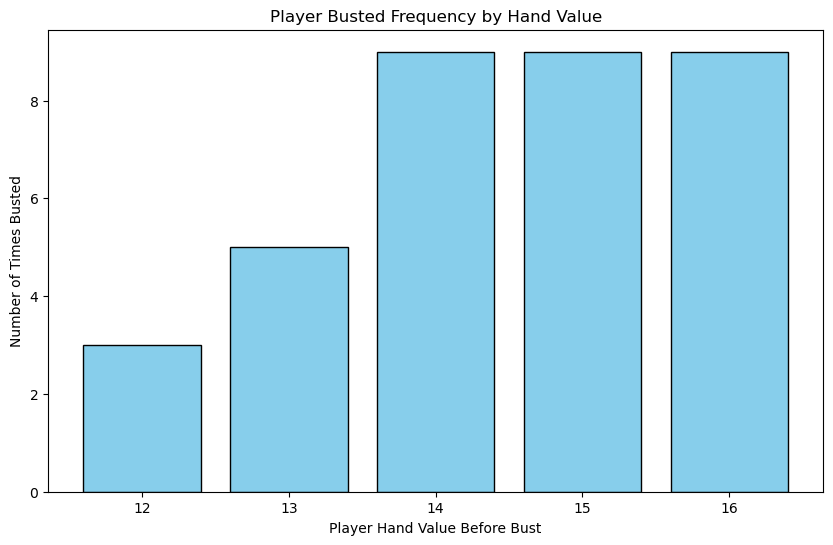

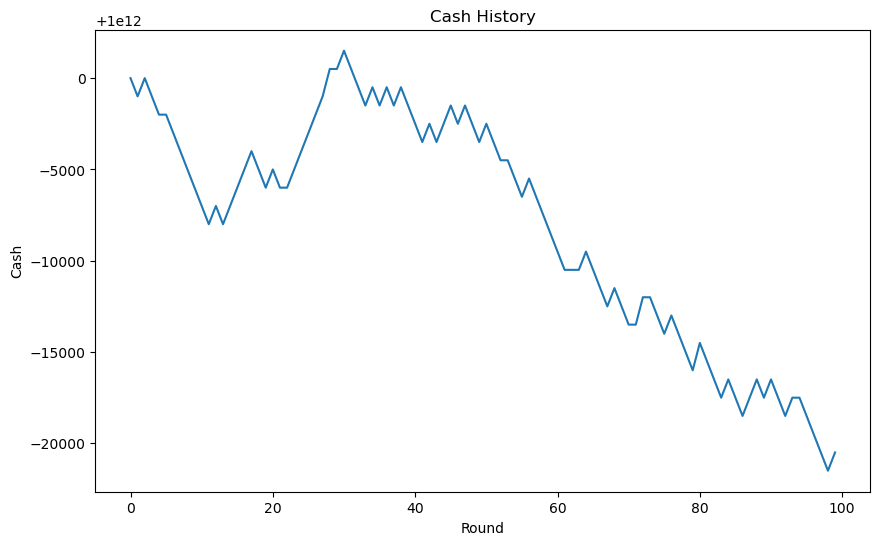

In [5]:
simulation(100)

Total round: 1000
Total cash: 1000000001500.0
Start Amount: 1000000000000
Profit: 1500.0
Win: 441
Lose: 464
Tie: 95
Player busted: 262
Dealer busted: 194
Win Rate: 0.441
Lose Rate: 0.464
Tie Rate: 0.095
Dealer Busted : Player Busted  =  1 : 1.3505154639175259


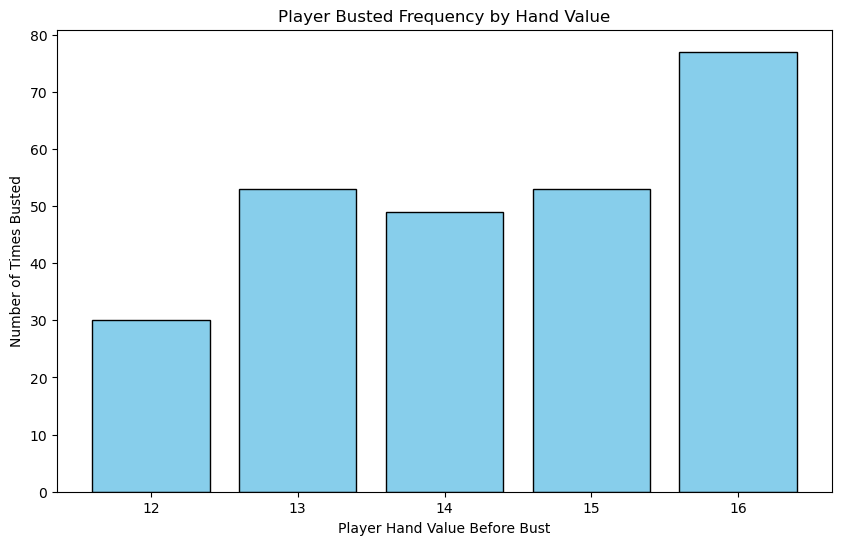

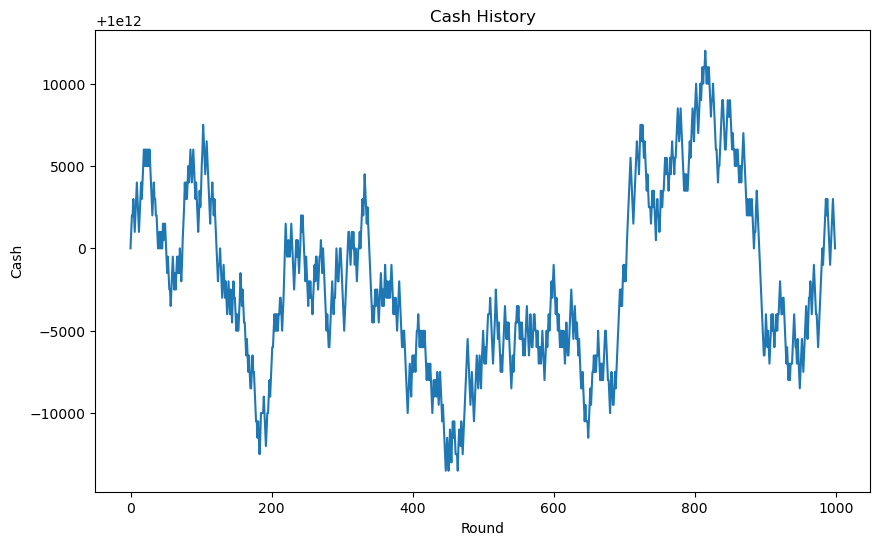

In [6]:
simulation(1000)

Total round: 10000
Total cash: 999999420500.0
Start Amount: 1000000000000
Profit: -579500.0
Win: 4075
Lose: 4878
Tie: 1047
Player busted: 2850
Dealer busted: 1894
Win Rate: 0.4075
Lose Rate: 0.4878
Tie Rate: 0.1047
Dealer Busted : Player Busted  =  1 : 1.504751847940866


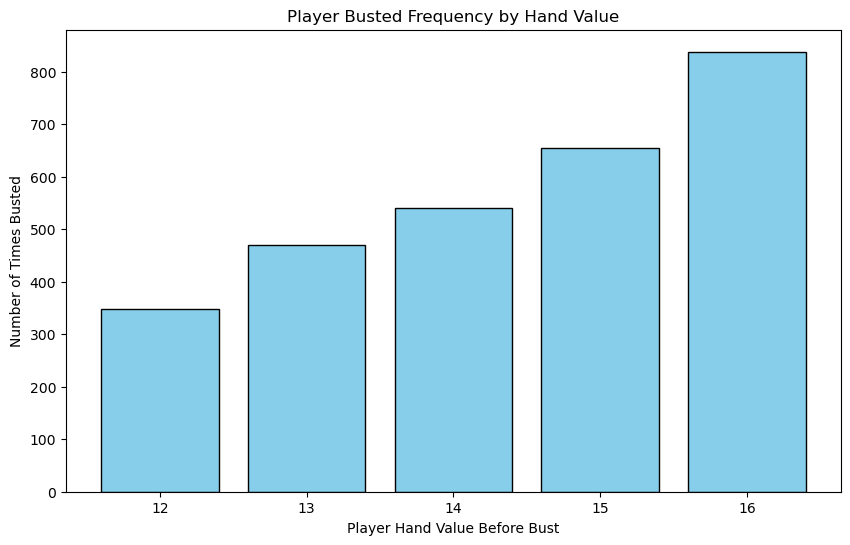

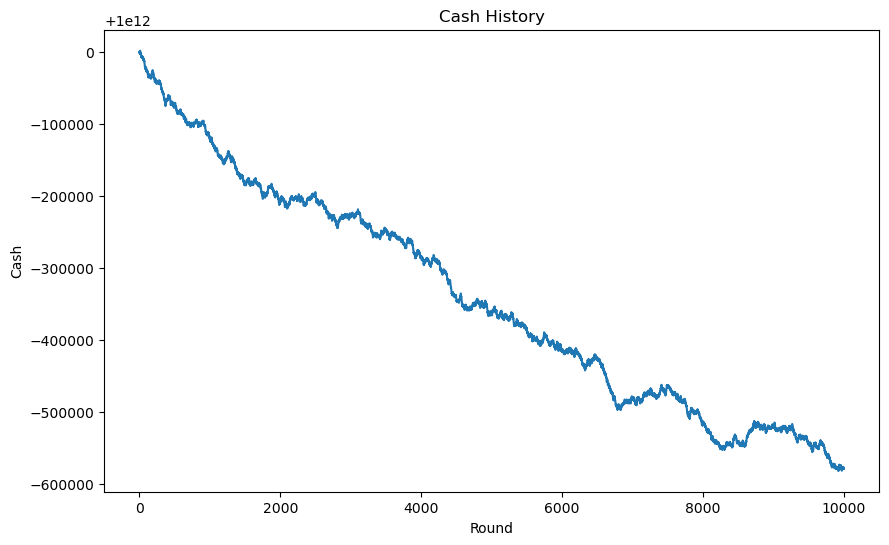

In [7]:
simulation(10000)

Total round: 100000
Total cash: 999995001000.0
Start Amount: 1000000000000
Profit: -4999000.0
Win: 41337
Lose: 48617
Tie: 10046
Player busted: 28065
Dealer busted: 18933
Win Rate: 0.41337
Lose Rate: 0.48617
Tie Rate: 0.10046
Dealer Busted : Player Busted  =  1 : 1.4823324354302012


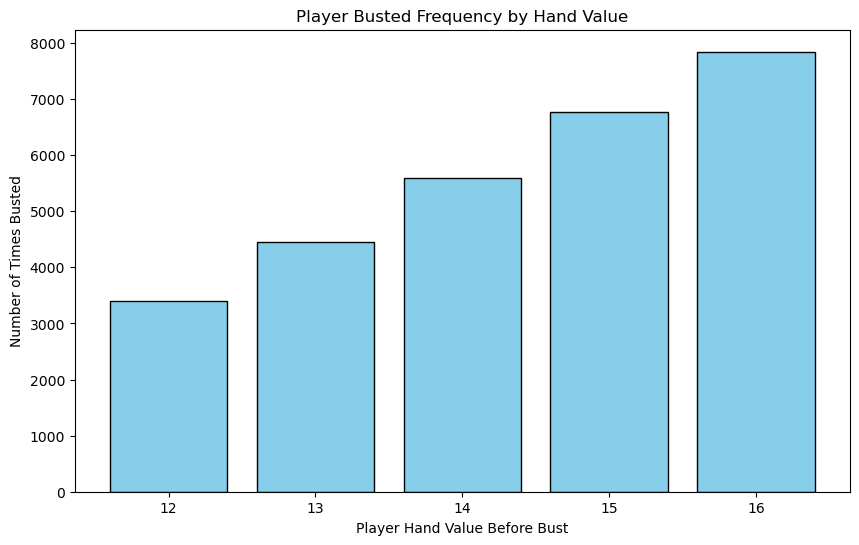

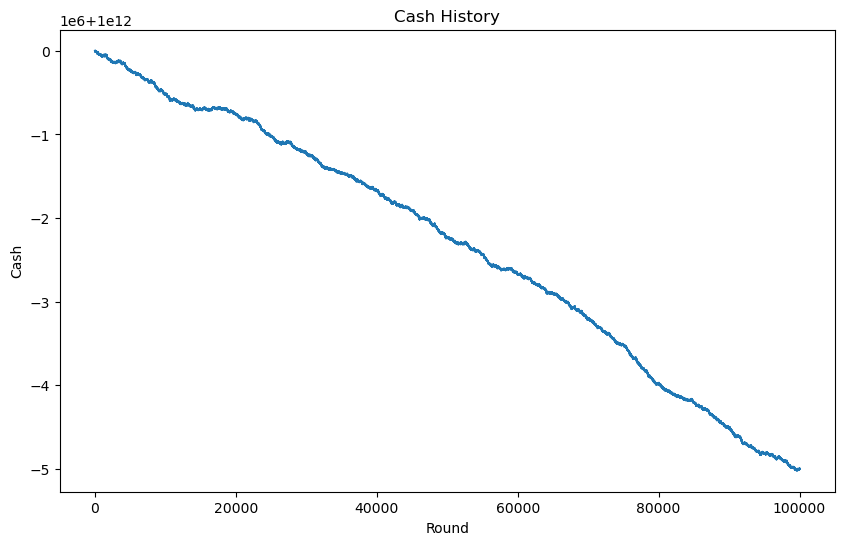

In [8]:
simulation(100000)

Total round: 1000000
Total cash: 999947020500.0
Start Amount: 1000000000000
Profit: -52979500.0
Win: 411500
Lose: 487222
Tie: 101278
Player busted: 281771
Dealer busted: 188857
Win Rate: 0.4115
Lose Rate: 0.487222
Tie Rate: 0.101278
Dealer Busted : Player Busted  =  1 : 1.4919807049778404


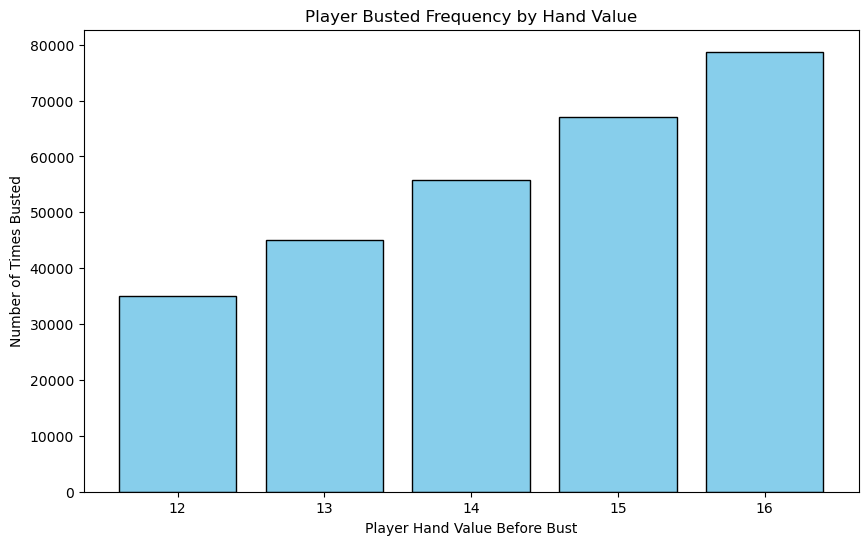

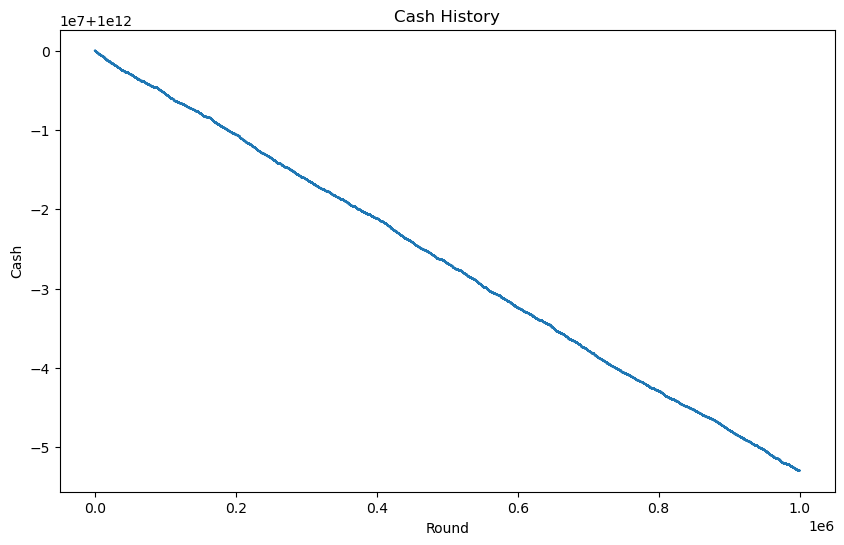

In [9]:
simulation(1000000)

Total round: 10000000
Total cash: 999469982500.0
Start Amount: 1000000000000
Profit: -530017500.0
Win: 4115966
Lose: 4872210
Tie: 1011824
Player busted: 2817287
Dealer busted: 1891469
Win Rate: 0.4115966
Lose Rate: 0.487221
Tie Rate: 0.1011824
Dealer Busted : Player Busted  =  1 : 1.4894703534660096


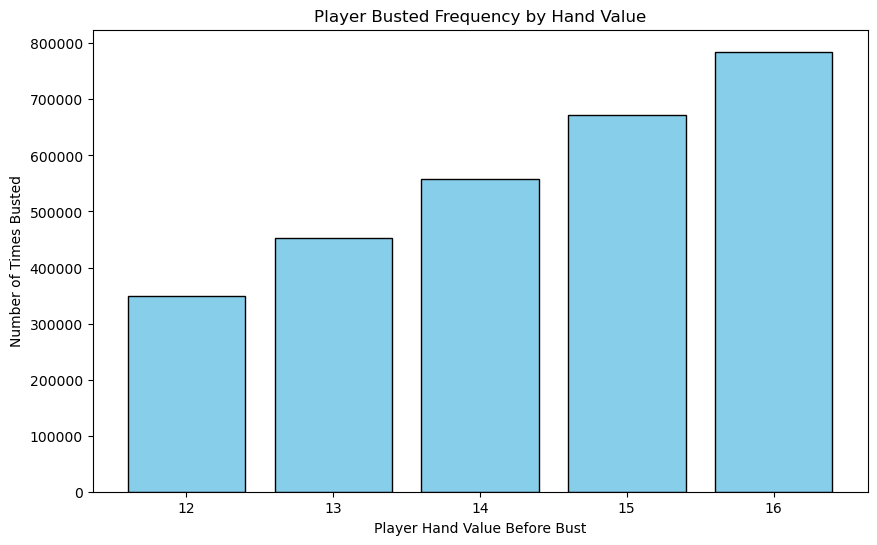

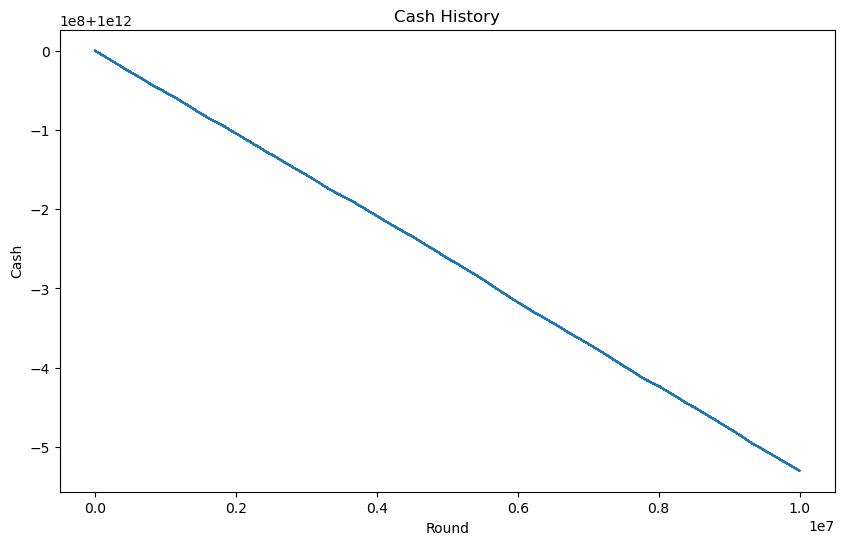

In [10]:
simulation(10000000)